# Exploratory Analysis of Rockets

In this project, I want to evaluate the data for Rockets created till date and are planned for future. I took the dataset from Kaggle (https://www.kaggle.com/akhilram7/allrocketsfrom1957). In addition, Zero to Pandas course is very informative and well prepared. I learned a lot of new things and thanks to assignments, I feel more comfortable about NumPy, Pandas, Matplotlib and Seaborn

## Data Preparation and Cleaning

### Importing libraries and dataset

In [1]:
# pip install pandas opendatasets matplotlib

Run the above cell to install the libraries needed to run the project

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (16, 6) # resizing the graphs
plt.rcParams['font.size'] = 12

In [3]:
od.download('https://www.kaggle.com/akhilram7/allrocketsfrom1957')

Skipping, found downloaded files in ".\allrocketsfrom1957" (use force=True to force download)


##### NOTE: The above cell requires kaggle credentials to import dataset

Now that we have the dataset we can move on to creating a dataframe from it and gain some insights

### Creating dataframe 

In [4]:
rocket_df_raw = pd.read_csv('allrocketsfrom1957/all-rockets-from-1957.csv')

In [5]:
rocket_df_raw.columns

Index(['Unnamed: 0', 'Name', 'Cmp', 'Wiki', 'Status', 'Liftoff Thrust',
       'Payload to LEO', 'Stages', 'Strap-ons', 'Rocket Height', 'Price',
       'Payload to GTO', 'Fairing Diameter', 'Fairing Height'],
      dtype='object')

In [6]:
rocket_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        416 non-null    int64  
 1   Name              416 non-null    object 
 2   Cmp               416 non-null    object 
 3   Wiki              407 non-null    object 
 4   Status            416 non-null    object 
 5   Liftoff Thrust    298 non-null    object 
 6   Payload to LEO    416 non-null    float64
 7   Stages            412 non-null    float64
 8   Strap-ons         396 non-null    float64
 9   Rocket Height     333 non-null    object 
 10  Price             106 non-null    object 
 11  Payload to GTO    416 non-null    float64
 12  Fairing Diameter  231 non-null    object 
 13  Fairing Height    167 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 45.6+ KB


In [7]:
rocket_df_raw.shape

(416, 14)

In [8]:
rocket_df_raw.sample(10)

,Unnamed: 0,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height
345,345,Soyuz 2.1v/Volga,RKK Energiya,https://en.wikipedia.org/wiki/Soyuz-2-1v,Active,NaN,2.85,4.0,0.0,NaN,NaN,0.00,3.7 m,7.7 m
62,62,Atlas-E/F Burner,General Dynamics,NaN,Retired,NaN,0.95,2.0,0.0,NaN,NaN,0.00,NaN,NaN
229,229,Long March 4C,CASC,https://en.wikipedia.org/wiki/Long_March_4C,Active,"2,971",4.20,3.0,0.0,45.8 m,$64.68 million,1.50,NaN,NaN
293,293,Proton M,Khrunichev,https://en.wikipedia.org/wiki/Proton-M,Planned,"10,532",0.00,3.0,0.0,58.2 m,$65.0 million,6.00,4.35 m,15.26 m
90,90,Atlas-SLV3B Agena-D,General Dynamics,https://en.wikipedia.org/wiki/Atlas-Agena,Retired,NaN,0.00,2.0,0.0,NaN,NaN,0.00,NaN,NaN
350,350,Soyuz FG,RKK Energiya,https://en.wikipedia.org/wiki/Soyuz-FG,Retired,"4,056",6.90,3.0,4.0,49.5 m,NaN,0.00,NaN,NaN
211,211,Long March 2C/SMA,CASC,https://en.wikipedia.org/wiki/Long_March_2C,Active,NaN,0.00,3.0,0.0,NaN,NaN,0.00,NaN,NaN
217,217,Long March 2F/G,CASC,https://en.wikipedia.org/wiki/Long_March_2F,Active,NaN,8.40,2.0,4.0,62.0 m,NaN,0.00,NaN,NaN
209,209,Long March 2C,CASC,https://en.wikipedia.org/wiki/Long_March_2C,Active,"2,962",3.85,2.0,0.0,42.0 m,$30.8 million,1.25,NaN,NaN
34,34,Antares 230,Yuzhnoye,https://en.wikipedia.org/wiki/Antares_(rocket),Retired,"1,922",7.00,2.0,0.0,41.9 m,$85.0 million,0.00,3.9 m,9.9 m


## Cleaning the Dataframe

After creating a dataframe from the data and having a look at a sample of the data we can find that there are some columns such as wiki, price that are not useful to us or contain too many empty or NAN values.

In this section we will remove the unwanted columns from our data as well as split the data in multiple dataframes

In [9]:
rocket_df = rocket_df_raw.drop(['Unnamed: 0', 'Wiki', 'Price', 'Fairing Diameter','Fairing Height'], axis = 1)

In order to get a dataframe without unwanted columns we used pandas drop() method which can remove columns or rows. 

Lets have a look at he sample of our new dataframe

In [10]:
rocket_df.sample(10)

,Name,Cmp,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Payload to GTO
14,Vostok-2,OKB-1,Retired,995,4.730,2.0,4.0,NaN,0.000
387,Thor DM-21 Agena-D,US Air Force,Retired,NaN,0.000,3.0,0.0,NaN,0.000
143,Delta II 7925-8,ULA,Retired,"3,511",0.000,3.0,9.0,38.1 m,1.780
265,New Shepard,Blue Origin,Active,490,0.000,2.0,0.0,18.0 m,0.000
67,Atlas-E/F SGS-1,General Dynamics,Retired,NaN,0.000,3.0,0.0,NaN,0.000
138,Delta II 7920H-10C,ULA,Retired,"4,398",5.959,2.0,9.0,38.9 m,0.000
38,Ariane 2,ESA,Retired,"2,580",0.000,3.0,0.0,49.13 m,2.175
32,Antares 120,Yuzhnoye,Retired,"1,630",4.600,2.0,0.0,40.5 m,1.500
298,PSLV-DL,ISRO,Active,"5,867",0.000,4.0,2.0,44.0 m,0.000
144,Delta II 7925H,ULA,Retired,"4,398",0.000,3.0,9.0,38.1 m,2.171


We can see that this some cells, such as 'Rocket Height', contains string values instead of numeric values

In [11]:
# removing string elements from columns and changing its dtype to float

rocket_df['Rocket Height'] = rocket_df['Rocket Height'].str.replace(' m', '').astype('float') 
rocket_df['Liftoff Thrust']= rocket_df['Liftoff Thrust'].str.replace(',', '').astype('float')

In [12]:
rocket_df = rocket_df.fillna(0)

To remove the 'NAN' values in the dataframe we used fillna(). Using fillna() function we replaced all the 'NAN' values with 0

In [13]:
rocket_df.describe()

,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Payload to GTO
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,5226.653846,6.333250,2.730769,1.711538,33.740986,1.715115
std,20425.441711,16.261489,0.896911,2.505601,23.136139,4.219524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,18.000000,0.000000
50%,1929.000000,0.500000,3.000000,0.000000,35.500000,0.000000
75%,5871.500000,6.645000,3.000000,4.000000,52.130000,2.200000
max,394723.000000,140.000000,5.000000,9.000000,118.000000,50.000000


The data in column 'Liftoff Thrust' has a very high max value. So in order to get a better distribution of data we will drop all the rows with liftoff value more than 100000. To do this we will use .drop method

In [14]:
rocket_df.drop(rocket_df[rocket_df['Liftoff Thrust']>100000].index, inplace= True)

Now that we have clean data , we can split the data into multiple dataframes.

In [15]:
active_rocket_df = rocket_df[rocket_df['Status'] == 'Active'].drop(['Status'], axis= 1)
retired_rocket_df = rocket_df[rocket_df['Status'] == 'Retired'].drop(['Status'], axis= 1)
planned_rocket_df = rocket_df[rocket_df['Status'] == 'Planned'].drop(['Status'], axis= 1)
produced_rockets = rocket_df[rocket_df['Status'].isin(['Active', 'Retired'])].drop(['Status'], axis= 1)

# Analysis and Visualisation

Now that we have clean and organised data, we can answer our questions.  

*In order to get a better understanding each graph has been colored according to the status of rockets represented in the data*

 The color codes for different status of rockets are as follows:
 * Active Rockets  : Green
 * Retired Rockets : Red
 * Planned Rockets : Pink
 
 * Rocket Produced till date : Blue

* Graphs plotted throughout the data are colored yellow

## Q1. Which Rockets have the most Thrust ?

Active rocket with most Thrust: 

In [16]:
most_thrust_active_rocket = active_rocket_df.sort_values(by= 'Liftoff Thrust', ascending = False).head(20)

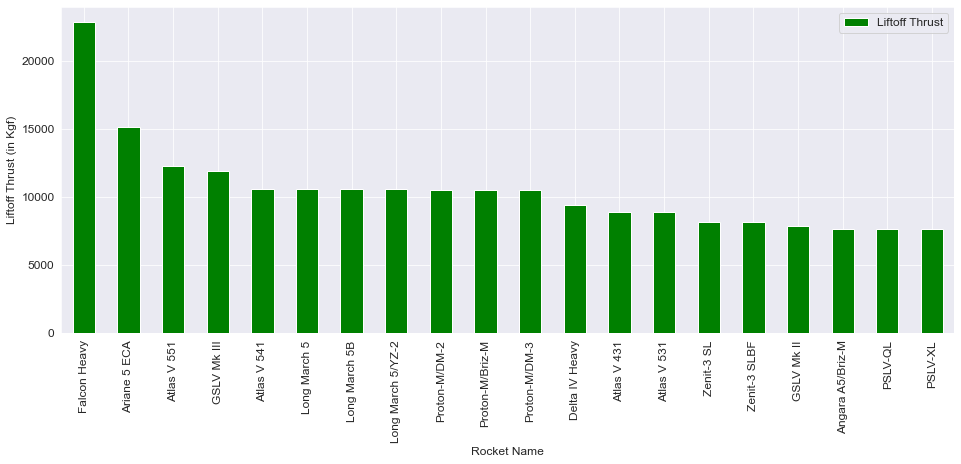

In [17]:
ax= most_thrust_active_rocket.plot.bar(x = 'Name', y = 'Liftoff Thrust', color= 'Green')
ax.set_xlabel('Rocket Name')
ax.set_ylabel('Liftoff Thrust (in Kgf)');

Planned rocket with most thrust:

In [18]:
most_thrust_planned_rocket = planned_rocket_df.sort_values(by= 'Liftoff Thrust', ascending = False).head(20)

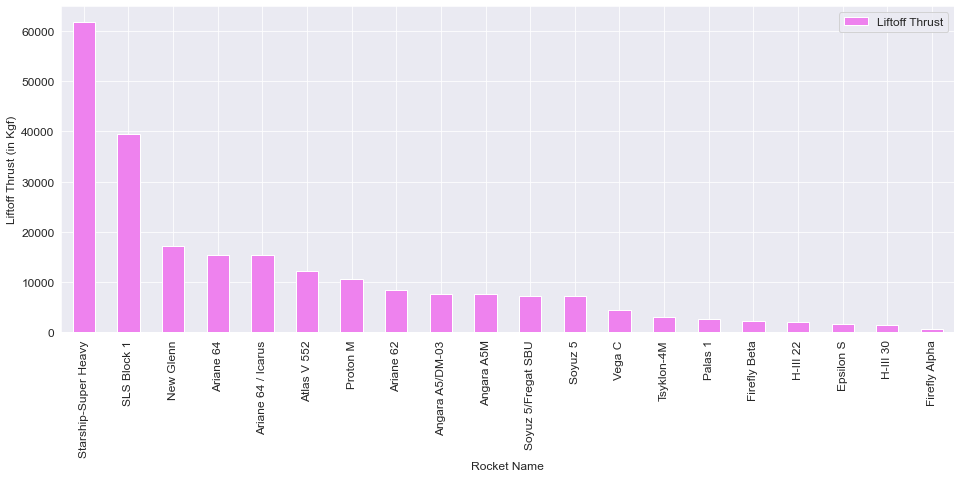

In [19]:
ax= most_thrust_planned_rocket.plot.bar(x = 'Name', y = 'Liftoff Thrust', color= 'violet')
ax.set_xlabel('Rocket Name')
ax.set_ylabel('Liftoff Thrust (in Kgf)');

Retired rocket with most thrust:

In [20]:
most_thrust_retired_rocket = retired_rocket_df.sort_values(by= 'Liftoff Thrust', ascending = False).head(20)

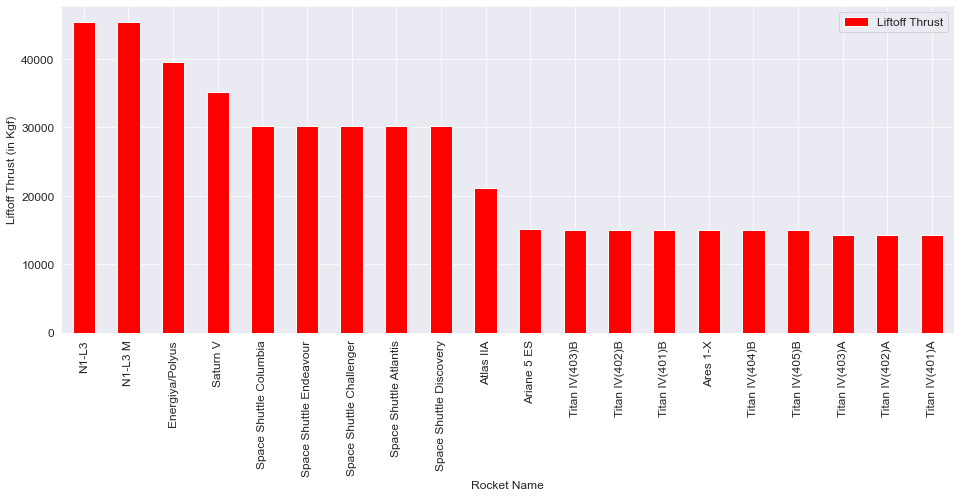

In [21]:
ax= most_thrust_retired_rocket.plot.bar(x = 'Name', y = 'Liftoff Thrust', color= 'Red')
ax.set_xlabel('Rocket Name')
ax.set_ylabel('Liftoff Thrust (in Kgf)');

Rocket with most thrust: 

In [22]:
most_thrust_rocket = rocket_df.sort_values(by= 'Liftoff Thrust', ascending = False).head(20)

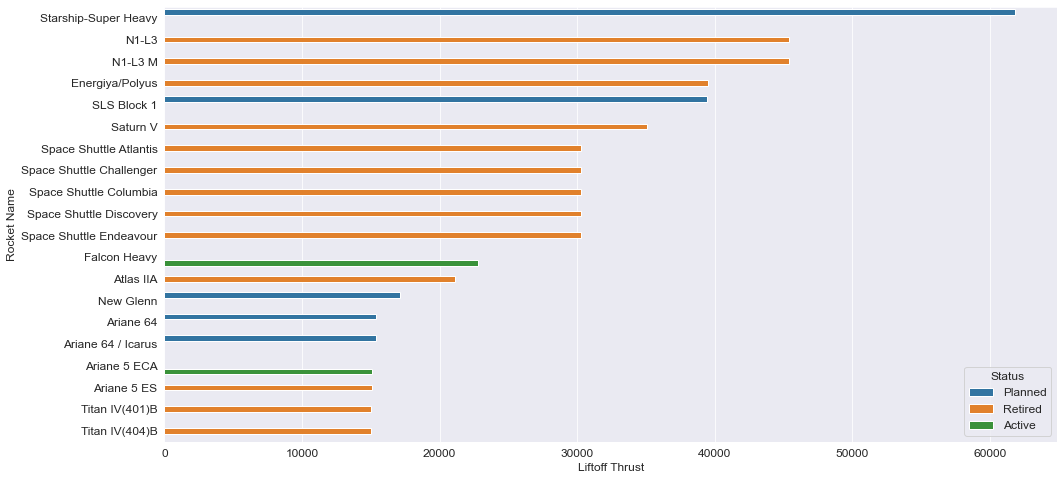

In [23]:
plt.figure(figsize= (16,8))
sns.barplot(x= 'Liftoff Thrust', y = 'Name', data= most_thrust_rocket, hue= 'Status')
plt.ylabel('Rocket Name');

In [24]:
rocket_df[rocket_df.Name == 'Starship-Super Heavy']

,Name,Cmp,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Payload to GTO
372,Starship-Super Heavy,SpaceX,Planned,61800.0,100.0,2.0,0.0,118.0,0.0


In [25]:
rocket_df[rocket_df.Name == 'N1-L3']

,Name,Cmp,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Payload to GTO
261,N1-L3,OKB-1,Retired,45400.0,95.0,5.0,0.0,105.0,0.0


In [26]:
rocket_df[rocket_df.Name == 'Falcon Heavy']

,Name,Cmp,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Payload to GTO
172,Falcon Heavy,SpaceX,Active,22819.0,63.8,2.0,2.0,70.0,26.7


From the above graph we can see that the rocket with most thrust overall is the planned rocket 'Starship-Super Heavy' produced by SpaceX 
* Active rocket with most Thrust : Falcon Heavy from SpaceX
* Retired rocket with most Thrust : N1-L3 from 
* Planned rocket with most Thrust : Starship-Super Heavy

### Q2. Which company produced rockets?

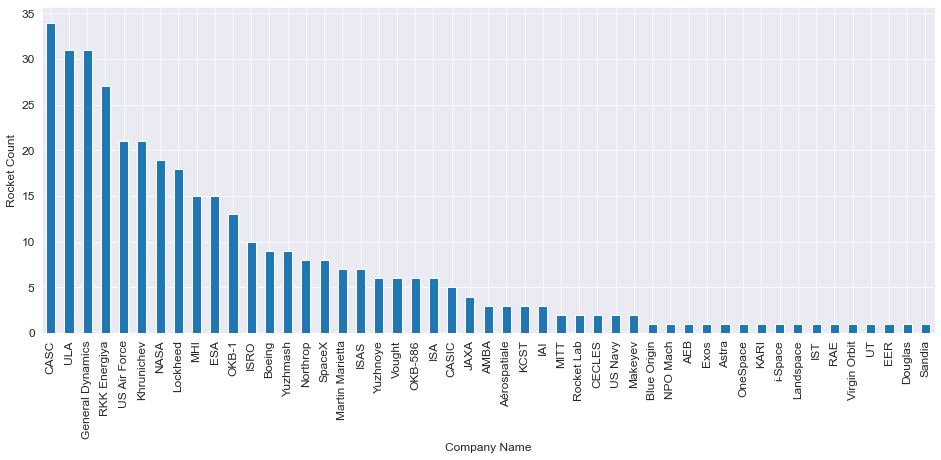

In [27]:
ax = produced_rockets['Cmp'].value_counts().plot.bar()
ax.set_xlabel('Company Name')
ax.set_ylabel('Rocket Count');

Here we can see that CASC produced the most rockets totaling over 30

### Q3. Which company possesses highest number of active rockets

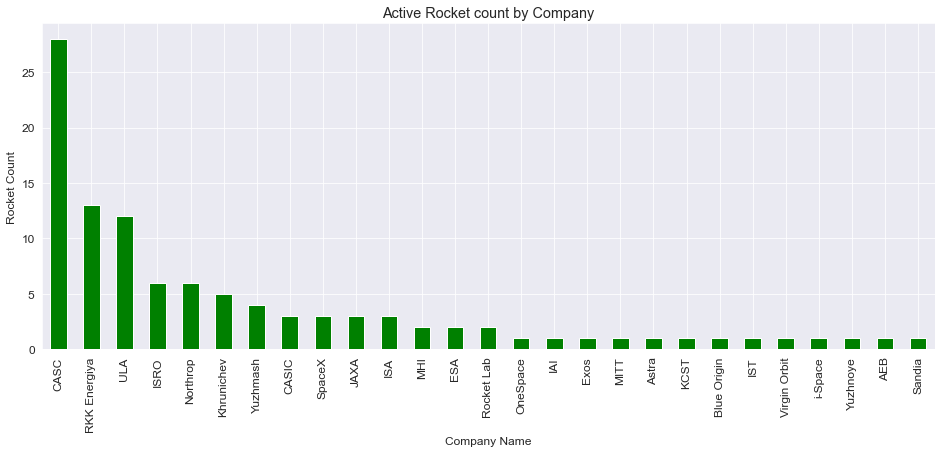

In [28]:
ax = active_rocket_df['Cmp'].value_counts().plot.bar(color = 'green', title= "Active Rocket count by Company")
ax.set_xlabel('Company Name')
ax.set_ylabel('Rocket Count');

* CASC possesses the most number of rockets which can be considered a good achievement considering CASC was founded in 1999

### Q4 Which company has most retired rockets?

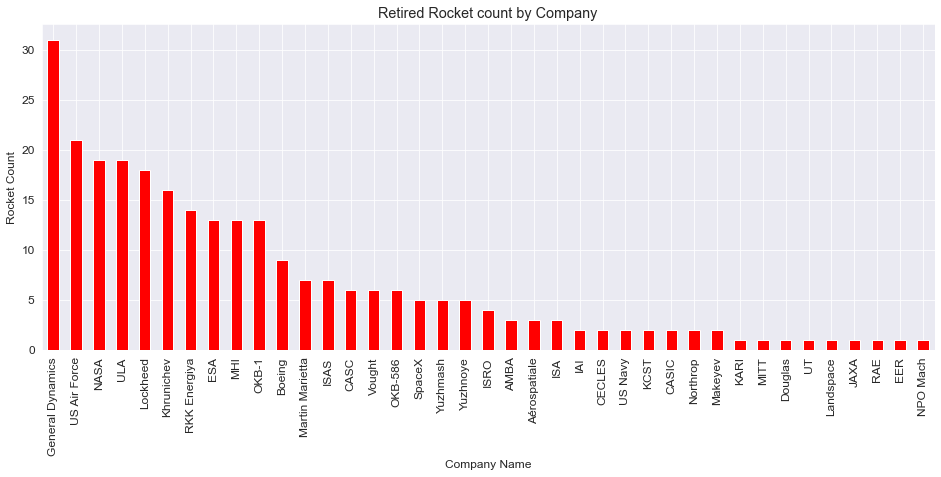

In [29]:
ax = retired_rocket_df['Cmp'].value_counts().plot.bar(color = 'Red', title= "Retired Rocket count by Company")
ax.set_xlabel('Company Name')
ax.set_ylabel('Rocket Count');

General Dynamics founded in 1952 has the most number of retired rockets. It can be seen compairing the most produced rockets and most retired rocket graph that most of *General Dynamics rockets* are retired.

### Q5. Which Company has most planned rockets?

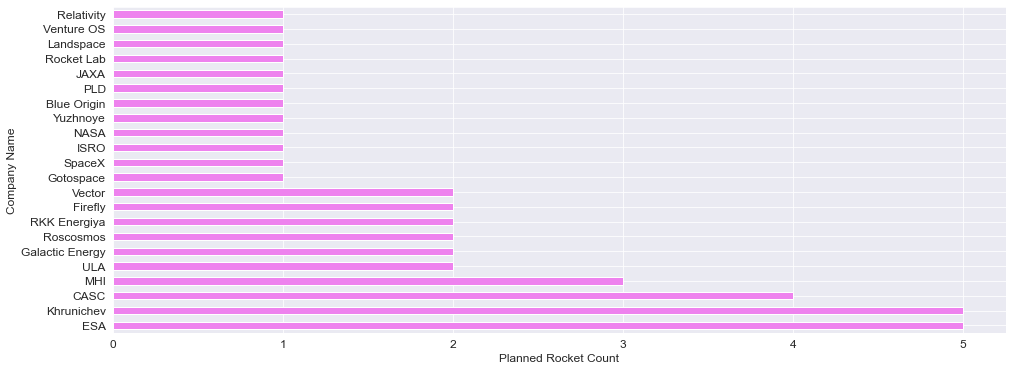

In [30]:
ax= planned_rocket_df['Cmp'].value_counts().plot.barh(color = 'violet');
ax.set_ylabel('Company Name')
ax.set_xlabel('Planned Rocket Count');

* ESA(European Space Agency) AND Khrunichev has the highest number of planned rockets

### Q6. Which is the tallest rocket produced?

In [31]:
tallest_rocket_df = produced_rockets.sort_values(by = 'Rocket Height' ,ascending = False)
tallest_rocket_df = tallest_rocket_df.head(20)

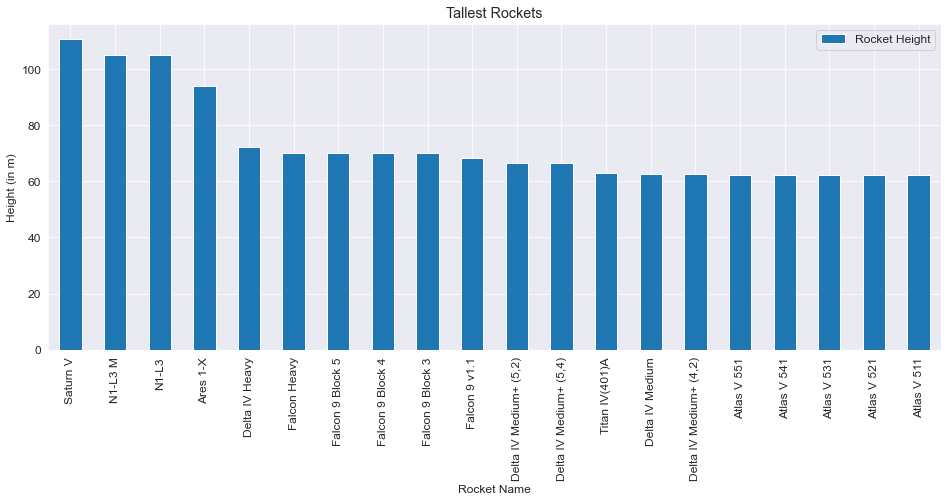

In [32]:
ax = tallest_rocket_df.plot.bar(x = 'Name', y = 'Rocket Height', title= 'Tallest Rockets')
ax.set_xlabel('Rocket Name')
ax.set_ylabel('Height (in m)');

* Saturn V is the tallest rocket ever produced.Some more Details about Saturn V are:

In [33]:
rocket_df[rocket_df.Name == 'Saturn V']

,Name,Cmp,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Payload to GTO
315,Saturn V,NASA,Retired,35100.0,140.0,3.0,0.0,110.6,0.0


### Q7. Which rocket has the highest payload capacity to Low Earth Orbit?

In [34]:
most_leo_payload_df = rocket_df.sort_values(by= 'Payload to LEO', ascending= False)

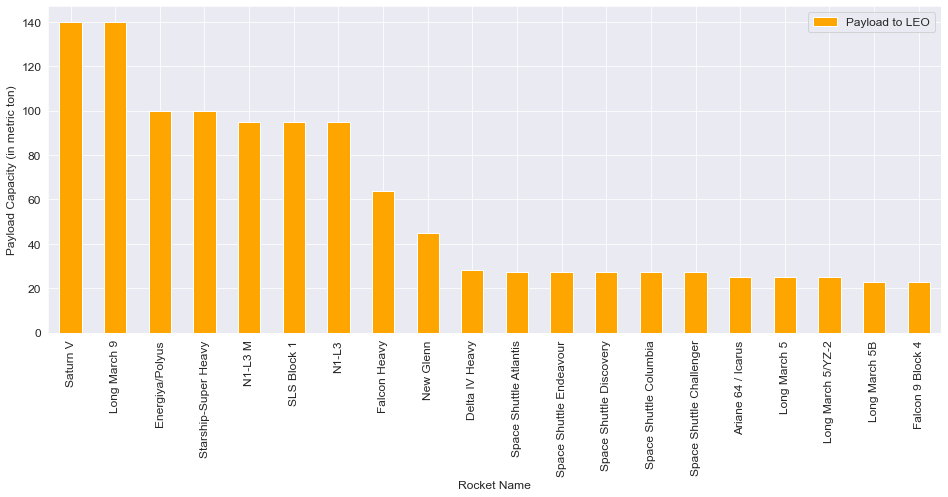

In [35]:
ax= most_leo_payload_df.head(20).plot.bar(x= 'Name', y= 'Payload to LEO', color= 'Orange')
ax.set_xlabel('Rocket Name')
ax.set_ylabel('Payload Capacity (in metric ton)');

* Saturn V and Long March 9 have the highest payload carrying caspacity among all the rockets ever produced or will be produced

Highest LEO Payload capacity in produced rockets:

In [36]:
most_leo_payload_produced = produced_rockets.sort_values(by= 'Payload to LEO', ascending= False)

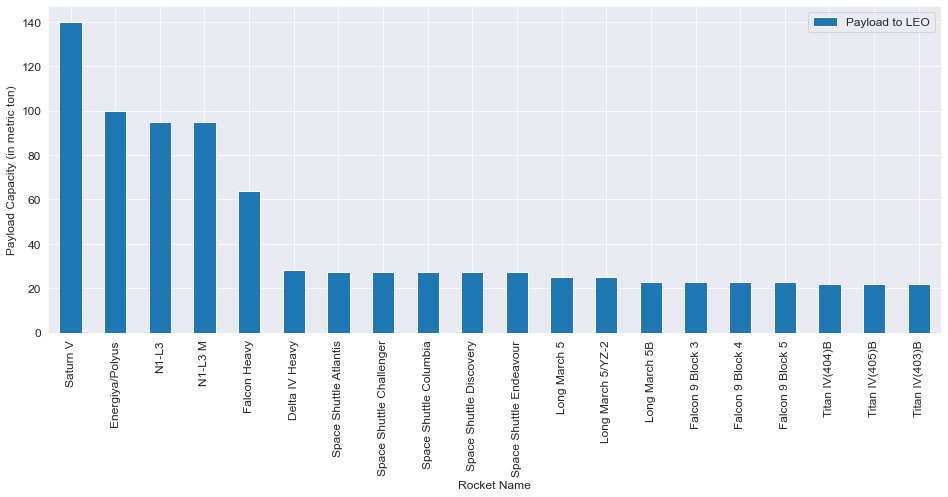

In [37]:
ax= most_leo_payload_produced.head(20).plot.bar(x= 'Name', y= 'Payload to LEO')
ax.set_xlabel('Rocket Name')
ax.set_ylabel('Payload Capacity (in metric ton)');

* Saturn V have the highest payload carrying caspacity among all the produced rockets

# Conclusion

In this project, we compared various rockets produced since 1957 on various aspects of rockets. We saw that some higher payload carrying capacity while some have a higher thrust at Liftoff.

## * Ideas for future work

The data contains some more aspects which i didn't compare, so some more insights can be gained from them

## References and Future Work


* dataset from: https://www.kaggle.com/akhilram7/allrocketsfrom1957

Other inspirations and references:
* https://jovian.ai/aakashns/python-eda-stackoverflow-survey
* https://www.stackoverflow.com 
* https://www.pandas.pydata.org



In [38]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shoubick001/analysis-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/shoubick001/analysis-project
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
